<a href="https://colab.research.google.com/github/ChaitanyaAS/INTERNSHIP_NGO/blob/main/Dogs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0/100 - Loss: 0.6833, Accuracy: 0.5938
Step 10/100 - Loss: 0.9524, Accuracy: 0.5199
Step 20/100 - Loss: 0.8307, Accuracy: 0.4866
Step 30/100 - Loss: 0.7864, Accuracy: 0.4758
Step 40/100 - Loss: 0.7636, Accuracy: 0.4809
Step 50/100 - Loss: 0.7499, Accuracy: 0.4822
Step 60/100 - Loss: 0.7408, Accuracy: 0.4846
Step 70/100 - Loss: 0.7342, Accuracy: 0.4908
Step 80/100 - Loss: 0.7292, Accuracy: 0.4907
Step 90/100 - Loss: 0.7252, Accuracy: 0.4942



Final Training Loss: 0.7230
Final Training Accuracy: 0.4978
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


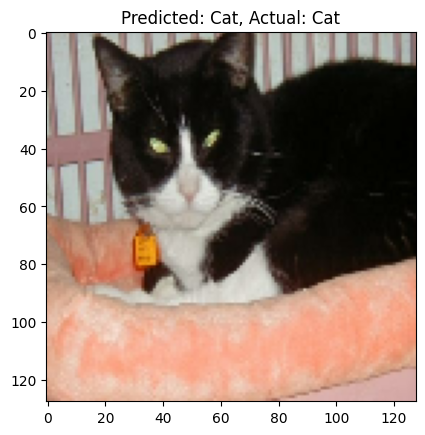

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


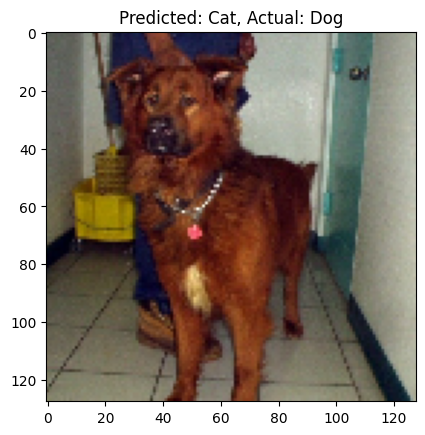

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


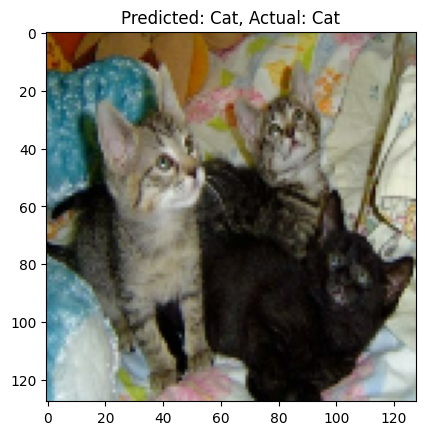

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


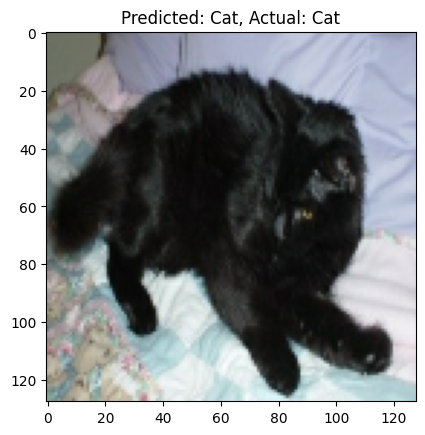

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


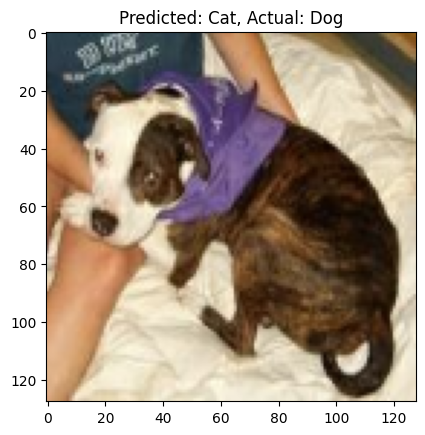

In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the cats_vs_dogs dataset
dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

# Preprocessing function
IMG_SIZE = 128  # Resize images to 128x128


def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize the image
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label


# Preprocess the training dataset
train_dataset = dataset['train']
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Batch and shuffle the dataset
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)
])

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.BinaryCrossentropy()

# Metrics for tracking progress
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

# Number of steps to train
STEPS = 100

# Training loop
for step, (images, labels) in enumerate(train_dataset.take(STEPS)):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Update metrics
    train_loss.update_state(loss)
    train_accuracy.update_state(labels, predictions)

    # Print progress
    if step % 10 == 0:
        print(f"Step {step}/{STEPS} - Loss: {train_loss.result():.4f}, Accuracy: {train_accuracy.result():.4f}")

# Final training metrics
print(f"\nFinal Training Loss: {train_loss.result():.4f}")
print(f"Final Training Accuracy: {train_accuracy.result():.4f}")

# Save the model (optional)
model.save('cats_vs_dogs_model.h5')

# Visualize a few predictions
for image, label in train_dataset.take(5):
    prediction = model.predict(tf.expand_dims(image[0], axis=0))[0]
    plt.imshow(image[0])
    plt.title(f"Predicted: {'Dog' if prediction > 0.5 else 'Cat'}, Actual: {'Dog' if label[0] == 1 else 'Cat'}")
    plt.show()
